In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import simps
from scipy.stats import ttest_ind



In [2]:
exp1 = pd.read_csv('one_cell_experiments_ver5.csv', header = 16, index_col = 0)
exp1_meta = exp1.iloc[0:5]
#convert data into dictionary containing dataframes for each measurement
exp1_meta = {}
exp1_time = {}
for i in range(5):
    colName = exp1.columns[i]
    #get indices for each run 
    indices = list(range(i,50,5))
    exp1_meta[colName] = exp1.iloc[0:5,indices]
    exp1_time[colName] = exp1.iloc[7:,indices].reset_index().drop('[reporter]',axis =1).astype(int)

In [3]:
exp1.head()

,number-of-cells,count bacteria1,count bacteria2,count neutrophils,count macrophages,number-of-cells.1,count bacteria1.1,count bacteria2.1,count neutrophils.1,count macrophages.1,...,number-of-cells.8,count bacteria1.8,count bacteria2.8,count neutrophils.8,count macrophages.8,number-of-cells.9,count bacteria1.9,count bacteria2.9,count neutrophils.9,count macrophages.9
[reporter],,,,,,,,,,,,,,,,,,,,,
[final],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[min],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[max],709,0,709,465,316,724,0,724,462,299,...,692,0,692,448,327,744,0,744,464,295
[mean],105.90547263681592,0,106.20398009950249,127.30845771144278,136.75124378109453,106.24378109452736,0,106.54228855721394,121.4726368159204,127.38308457711443,...,107,0,107.29850746268657,121.49751243781094,137.73134328358208,107.86069651741293,0,108.1592039800995,125.09452736318408,124.88059701492537
[steps],200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [4]:
#get information for exp 2 and 3, which have two different species of bacteria. In experiment 3, bacteria1 becomes predatory
exp2_3 = pd.read_csv('two_cell_experiments_ver5.csv', header = 16, index_col = 0)
exp2 = exp2_3.iloc[:,0:50]
exp3 = exp2_3.iloc[:,50:]

In [5]:
#convert data into dictionary containing dataframes for each measurement
exp2_meta = {}
exp2_time = {}
for i in range(5):
    colName = exp1.columns[i]
    #get indices for each run 
    indices = list(range(i,50,5))
    exp2_meta[colName] = exp2.iloc[0:5,indices]
    exp2_time[colName] = exp2.iloc[7:,indices].reset_index().drop('[reporter]',axis =1).astype(int)

In [6]:
#convert data into dictionary containing dataframes for each measurement
exp3_meta = {}
exp3_time = {}
for i in range(5):
    colName = exp1.columns[i]
    #get indices for each run 
    indices = list(range(i,50,5))
    exp3_meta[colName] = exp3.iloc[0:5,indices]
    exp3_time[colName] = exp3.iloc[7:,indices].reset_index().drop('[reporter]',axis =1).astype(int)

In [7]:
exp1_time['number-of-cells']

,number-of-cells,number-of-cells.1,number-of-cells.2,number-of-cells.3,number-of-cells.4,number-of-cells.5,number-of-cells.6,number-of-cells.7,number-of-cells.8,number-of-cells.9
0,92,87,91,84,92,86,88,81,90,98
1,120,119,119,117,118,117,119,119,120,120
2,182,171,180,161,179,166,172,160,180,194
3,231,233,232,221,231,226,231,231,233,233
4,347,325,343,300,338,317,325,305,338,366
...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0


In [8]:
exp1_time['count bacteria2'].iloc[:,0][exp1_time['count bacteria2'].iloc[:, 0] == 0].index[0]

59

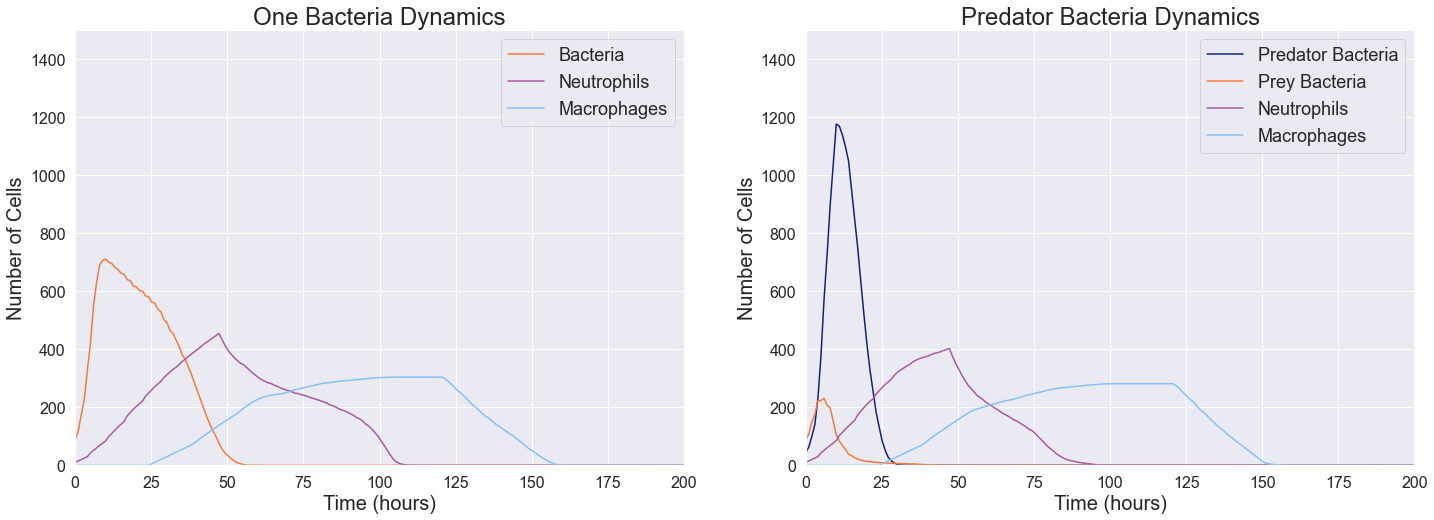

In [9]:
sns.set()

time = np.linspace(0,200,200)

fig, axes = plt.subplots(1, 2, figsize=(24,8))

expr_list = [exp1_time, exp3_time]
titles = ['One Bacteria Dynamics', 'Predator Bacteria Dynamics']



one_bac_sums = []
one_bac_t = []
one_bac_neu_sums = []
one_bac_neu_t = []
one_bac_mac_sums = []
one_bac_mac_t = []

pred_bac_sums = []
pred_bac_t = []
pred_bac_neu_sums = []
pred_bac_neu_t = []
pred_bac_mac_sums = []
pred_bac_mac_t = []

for i in range(len(expr_list)):
    
    ax = axes[i]
    
    experiment = expr_list[i]
    #get means for time data and plot
    numBact = experiment['number-of-cells'].mean(axis = 1)
    bact1 = experiment['count bacteria1'].mean(axis = 1)
    bact2 = experiment['count bacteria2'].mean(axis = 1)
    neutrophil = experiment['count neutrophils'].mean(axis = 1)
    macrophage = experiment['count macrophages'].mean(axis = 1)
    
    if i == 0:
        for k in range(10):
            one_bac_sums.append(simps(experiment['count bacteria2'].iloc[:, k], dx=1))
            one_bac_neu_sums.append(simps(experiment['count neutrophils'].iloc[:, k], dx=1))
            one_bac_mac_sums.append(simps(experiment['count macrophages'].iloc[:, k], dx=1))
            
            one_bac_t.append(experiment['count bacteria2'].iloc[:,k][experiment['count bacteria2'].iloc[:, k] == 0].index[0])
            one_bac_neu_t.append(experiment['count neutrophils'].iloc[50:,k][experiment['count neutrophils'].iloc[50:, k] == 0].index[0])
            one_bac_mac_t.append(experiment['count macrophages'].iloc[50:,k][experiment['count macrophages'].iloc[50:, k] == 0].index[0])
            
            
            
    if i == 1:
        for k in range(10):
            pred_bac_sums.append(simps(experiment['count bacteria2'].iloc[:, k], dx=1))
            pred_bac_neu_sums.append(simps(experiment['count neutrophils'].iloc[:, k], dx=1))
            pred_bac_mac_sums.append(simps(experiment['count macrophages'].iloc[:, k], dx=1))
            
            pred_bac_t.append(experiment['count bacteria2'].iloc[:,k][experiment['count bacteria2'].iloc[:, k] == 0].index[0])
            pred_bac_neu_t.append(experiment['count neutrophils'].iloc[50:,k][experiment['count neutrophils'].iloc[50:, k] == 0].index[0])
            pred_bac_mac_t.append(experiment['count macrophages'].iloc[50:,k][experiment['count macrophages'].iloc[50:, k] == 0].index[0])


    
    if i == 0:
        ax.plot(time, bact2, label = 'Bacteria', color='#F5793A')
    if i == 1:
        ax.plot(time, bact1, label = 'Predator Bacteria', color='#0F2080')
        ax.plot(time, bact2, label = 'Prey Bacteria', color='#F5793A')
        
    ax.plot(time, neutrophil, label = 'Neutrophils', color='#A95AA1')
    ax.plot(time, macrophage, label = 'Macrophages', color='#85C0F9')
    
    
    
    ax.set_xlim((0, 200))
    ax.set_ylim((0, 1500))
    
    ax.set_ylabel('Number of Cells', fontsize=20)
    ax.set_xlabel('Time (hours)', fontsize=20)
    
    
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    
    ax.set_title(titles[i], fontsize=24)
    
    ax.legend(fontsize=18)

Possible Other Plots:
1. Maximum macrophage count required for elimination of bacteria
2. Time until elimination of bacteria in each case
3. Maximum total number of bacteria

In [10]:
np.mean(one_bac_sums), np.std(one_bac_sums)

(21669.641666666666, 525.7169589263576)

In [11]:
np.mean(pred_bac_sums), np.std(pred_bac_sums)

(2323.4999999999995, 583.8371847812823)

In [12]:
np.mean(one_bac_t), np.std(one_bac_t)

(57.2, 1.32664991614216)

In [13]:
np.mean(pred_bac_t), np.std(pred_bac_t)

(34.8, 5.418486873657627)

In [14]:
np.mean(one_bac_neu_sums), np.std(one_bac_neu_sums)

(24591.416666666664, 592.1393417093648)

In [15]:
np.mean(pred_bac_neu_sums), np.std(pred_bac_neu_sums)

(17653.216666666664, 1532.7756391592345)

In [16]:
np.mean(one_bac_neu_t), np.std(one_bac_neu_t)

(109.6, 1.8547236990991407)

In [17]:
np.mean(pred_bac_neu_t), np.std(pred_bac_neu_t)

(87.8, 4.64327470649756)

In [18]:
np.mean(one_bac_mac_sums), np.std(one_bac_mac_sums)

(26115.3, 1089.5486267257643)

In [24]:
np.mean(pred_bac_mac_sums), np.std(pred_bac_mac_sums)

(22725.3, 1605.6357650476014)

In [19]:
np.mean(one_bac_mac_t), np.std(one_bac_mac_t)

(159.4, 2.6907248094147422)

In [20]:
np.mean(pred_bac_mac_t), np.std(pred_bac_mac_t)

(154.0, 2.6832815729997477)

| One Bacteria System        | Mean          | Std. Dev.  | p-value (two-sample t-test) |
| ------------- |:-------------:| -----:|
| Prey Bacteria |21669.6 | 525.7 |
| Macrophages     | centered      |    |
| Neutrophils | are neat      |     |

In [21]:
ttest_ind(one_bac_sums, pred_bac_sums)

Ttest_indResult(statistic=73.8732348476013, pvalue=8.331668900362237e-24)

In [22]:
ttest_ind(one_bac_neu_sums, pred_bac_neu_sums)

Ttest_indResult(statistic=12.66729141263705, pvalue=2.1015247372504045e-10)

In [23]:
ttest_ind(one_bac_mac_sums, pred_bac_mac_sums)

Ttest_indResult(statistic=4.769533253210148, pvalue=0.00015326384413494098)

In [24]:
ttest_ind(one_bac_t, pred_bac_t)

Ttest_indResult(statistic=12.046183621618857, pvalue=4.743770041579348e-10)

In [25]:
ttest_ind(one_bac_neu_t, pred_bac_neu_t)

Ttest_indResult(statistic=13.079999999999998, pvalue=1.245228209152771e-10)

In [26]:
ttest_ind(one_bac_mac_t, pred_bac_mac_t)

Ttest_indResult(statistic=4.263157894736847, pvalue=0.00046780242381734956)

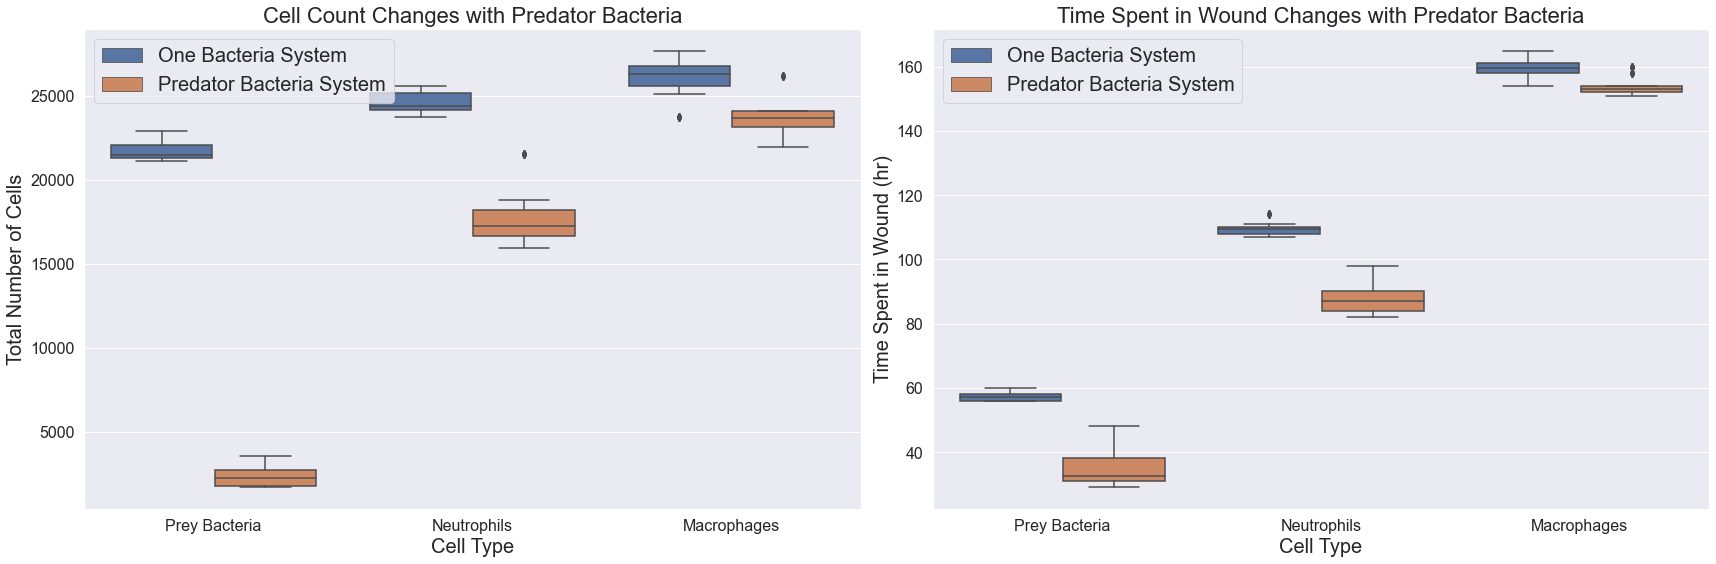

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(24,8))

df = pd.DataFrame(columns=["Cell Type", "Total Cell Count", "System"])
df = df.append({"Cell Type": "Prey Bacteria",
                "Total Cell Count": one_bac_sums,
                "Time in Wound": one_bac_t,
                "System": "One Bacteria System"},
                ignore_index=True)
df = df.append({"Cell Type": "Neutrophils",
                "Total Cell Count": one_bac_neu_sums,
                "Time in Wound": one_bac_neu_t,
                "System": "One Bacteria System" },
                ignore_index=True)
df = df.append({"Cell Type": "Macrophages",
                "Total Cell Count": one_bac_mac_sums,
                "Time in Wound": one_bac_mac_t,
                "System": "One Bacteria System" },
                ignore_index=True)
df = df.append({"Cell Type": "Prey Bacteria",
                "Total Cell Count": pred_bac_sums,
                "Time in Wound": pred_bac_t,
                "System": "Predator Bacteria System"},
                ignore_index=True)
df = df.append({"Cell Type": "Neutrophils" ,
                "Total Cell Count": pred_bac_neu_sums,
                "Time in Wound": pred_bac_neu_t,
                "System": "Predator Bacteria System" },
                ignore_index=True)
df = df.append({"Cell Type": "Macrophages",
                "Total Cell Count": pred_bac_mac_sums,
                "Time in Wound": pred_bac_mac_t,
                "System": "Predator Bacteria System"},
                ignore_index=True)
df = df.explode("Total Cell Count", ignore_index=True)
df = df.explode("Time in Wound", ignore_index=True)

ax = axes[0]
sns.boxplot(x="Cell Type", y="Total Cell Count", data=df, hue="System", orient='v', ax=ax)


ax.set_ylabel("Total Number of Cells", fontsize=20)
ax.set_xlabel("Cell Type", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.set_title("Cell Count Changes with Predator Bacteria", fontsize=22)

ax.legend(fontsize=20)

ax = axes[1]
sns.boxplot(x="Cell Type", y="Time in Wound", data=df, hue="System", orient='v', ax=ax)


ax.set_ylabel("Time Spent in Wound (hr)", fontsize=20)
ax.set_xlabel("Cell Type", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.set_title("Time Spent in Wound Changes with Predator Bacteria", fontsize=22)

ax.legend(fontsize=20)

plt.tight_layout()


In [28]:
df

,Cell Type,Total Cell Count,System,Time in Wound
0,Prey Bacteria,21243.3,One Bacteria System,59
1,Prey Bacteria,21243.3,One Bacteria System,56
2,Prey Bacteria,21243.3,One Bacteria System,57
3,Prey Bacteria,21243.3,One Bacteria System,57
4,Prey Bacteria,21243.3,One Bacteria System,56
...,...,...,...,...
595,Macrophages,26164,Predator Bacteria System,152
596,Macrophages,26164,Predator Bacteria System,153
597,Macrophages,26164,Predator Bacteria System,152
598,Macrophages,26164,Predator Bacteria System,153
